In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

from PIL import Image, ImageDraw, ImageFont
from subprocess import check_call
from IPython.display import Image as PImage

def scoring_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print('Precision: %.3f, Recall: %.3f, Accuracy: %.3f' % (precision, recall, accuracy))
    return(precision, recall, accuracy)

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
input_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
sample_submission = pd.read_csv('../input/sample_submission.csv')

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [4]:
X = input_df[[str(x) for x in range(300)]]
y = input_df['target']

In [5]:
input_df.columns

Index(['id', 'target', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=302)

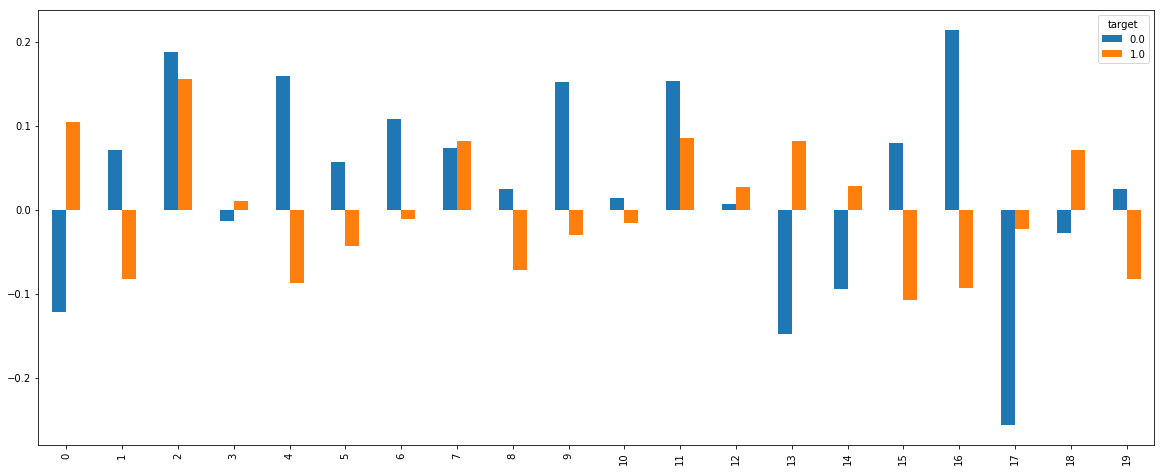

In [6]:
input_df[['target'] + [str(x) for x in range(20)]].groupby('target').mean().T.plot(kind='bar', figsize=(20,8), stacked=False)

In [ ]:
def tag_sign(x):
    return 1 if x >=0 else 0
X_bool = X.applymap(tag_sign)

In [ ]:
input_df['target'].value_counts()

In [ ]:
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)
# ------------------------------------------------
gbm_clf = GradientBoostingClassifier()
gbm_clf.fit(X_train, y_train)
res = scoring_model(gbm_clf, X_test, y_test)

submission_df = pd.DataFrame({'id':test_df['id'],
                              'target':gbm_clf.predict(test_df[[str(x) for x in range(300)]])
                             })
submission_df['target'].value_counts()
submission_df.to_csv('submission006.csv', index=False)

In [ ]:
# ------------------------------------------------
# Defining X_test and train from X_bool
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_bool, y, test_size=0.20, random_state=16)
# ------------------------------------------------
gaussianNB_clf = GaussianNB(priors=[90/250, 160/250])
gaussianNB_clf.fit(X_train, y_train)
res = scoring_model(gaussianNB_clf, X_test, y_test)

submission_df = pd.DataFrame({'id':test_df['id'],
                              'target':gaussianNB_clf.predict(test_df[[str(x) for x in range(300)]])
                             })
submission_df['target'].value_counts()
#submission_df.to_csv('submission005.csv', index=False)

In [ ]:
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)
# ------------------------------------------------
adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(X_train, y_train)
res = scoring_model(adaboost_clf, X_test, y_test)

submission_df = pd.DataFrame({'id':test_df['id'],
                              'target':adaboost_clf.predict(test_df[[str(x) for x in range(300)]])
                             })
submission_df.to_csv('submission008.csv', index=False)

In [ ]:
svm_clf = SVC(gamma='auto', kernel='rbf')
svm_clf.fit(X_train, y_train)
res = scoring_model(svm_clf, X_test, y_test)

submission_df = pd.DataFrame({'id':test_df['id'],
                              'target':svm_clf.predict(test_df[[str(x) for x in range(300)]])
                             })

submission_df['target'].value_counts()

In [7]:
import statsmodels.formula.api as sm

In [36]:
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)
# ------------------------------------------------
dt_clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)
dt_clf.fit(X_train, y_train)
res = scoring_model(dt_clf, X_test, y_test)

submission_df = pd.DataFrame({'id':test_df['id'],
                              'target':dt_clf.predict(test_df[[str(x) for x in range(300)]])
                             })

submission_df.to_csv('submission009.csv', index=False)

Precision: 0.750, Recall: 0.686, Accuracy: 0.620


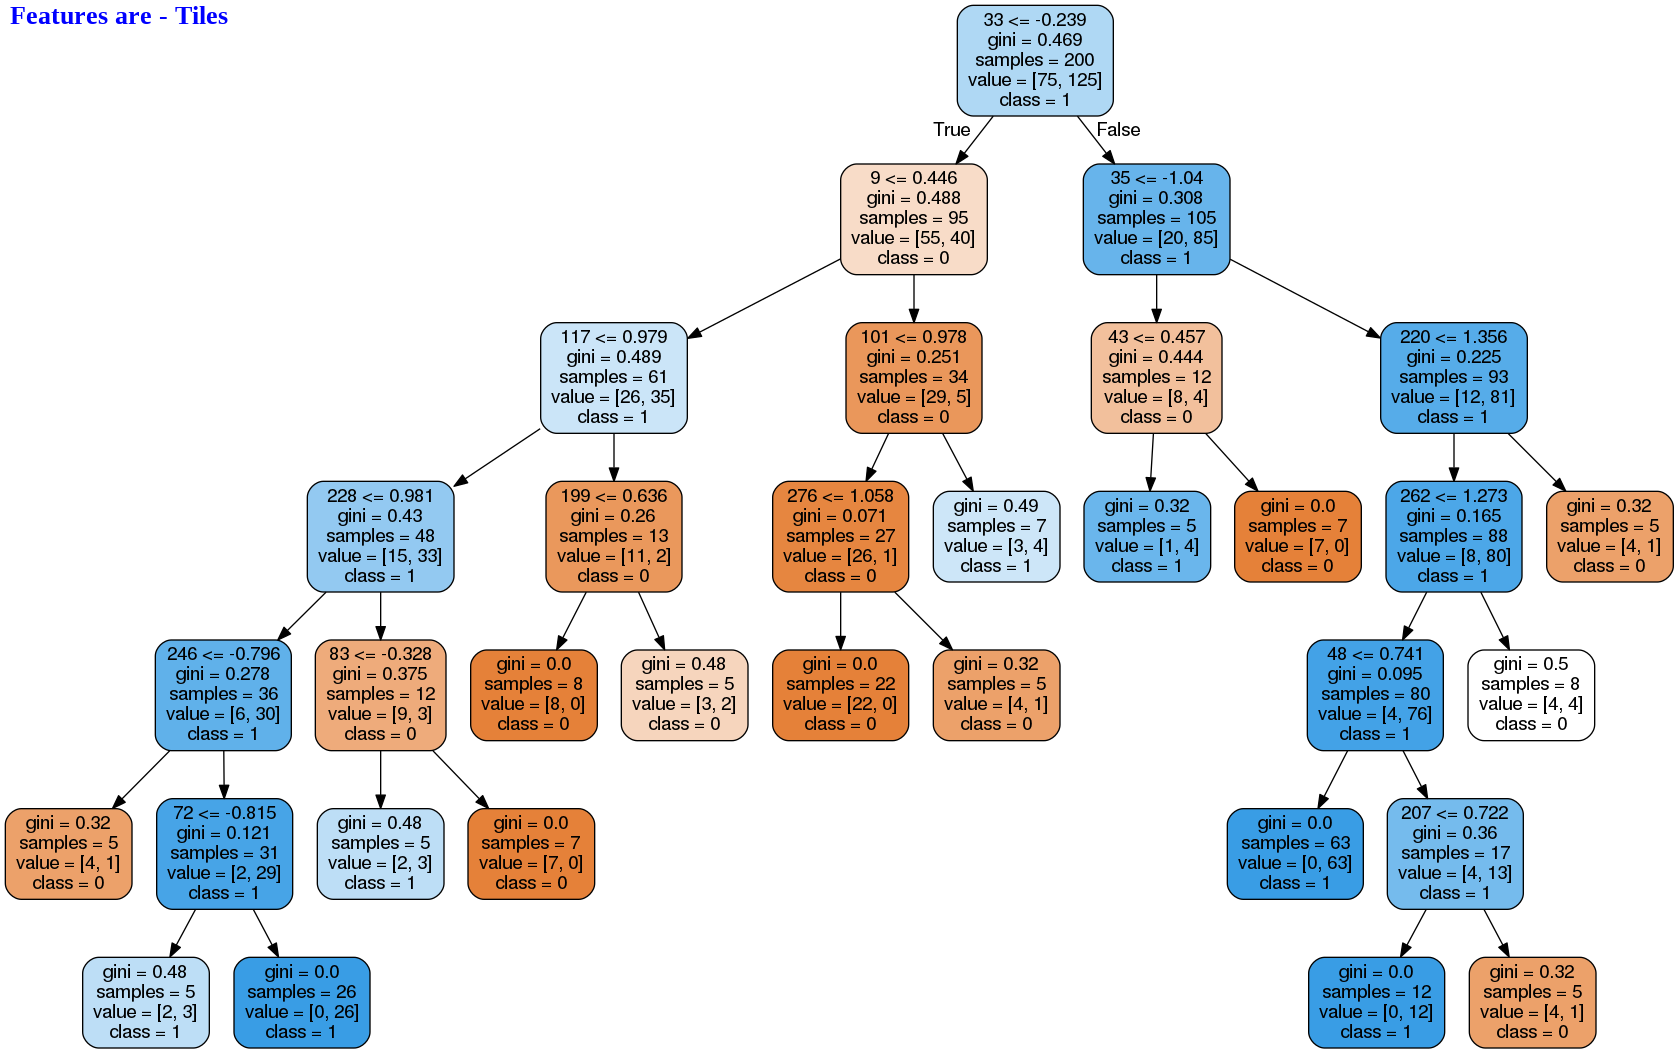

In [34]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(dt_clf,
                              out_file=f,
#                              max_depth = 5,
                              impurity = True,
                              feature_names = X.columns,
                              class_names = ['0', '1'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 26)
draw.text((10, 0), # Drawing offset (position)
          'Features are - Tiles', # Text to draw
          (0,0,255), # RGB desired color
          font=font) # ImageFont object with desired font
img.save('sample-out.png')
PImage("sample-out.png")

# Code to check available fonts and respective paths
# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')